In [32]:
import Helper
import pandas as pd
import datetime
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

## 2 Yr Lagged Dataset

In [33]:
data_set = Helper.load_data('2_Y_Lag','../Datasets/Lagged/')
data_set = Helper.proc_data(data_set)
data_set['DATE'] = pd.to_datetime(data_set['DATE'], format="%d-%m-%Y")
train_data_set = data_set[data_set['DATE'] < '2006-01-01']

target_var = 'GDP'
feature_vars = train_data_set.columns.to_list()
feature_vars.remove(target_var)
feature_vars.remove('DATE')

x_train = train_data_set[feature_vars].to_numpy()
y_train = train_data_set[target_var].to_numpy()

PolyReg_Model = Pipeline([
                    ('poly_features', PolynomialFeatures(degree=4, interaction_only=True)),  # Polynomial Feature Generator
                    ('linear_regression', LinearRegression(fit_intercept= True))  # Linear regression
                ])

RF_model = RandomForestRegressor(criterion= 'squared_error',max_depth= 30, max_features= 0.5, min_samples_leaf= 1, min_samples_split= 2, n_estimators= 1000)

PolyReg_Model.fit(x_train, y_train)
RF_model.fit(x_train, y_train)

RandomForestRegressor(max_depth=30, max_features=0.5, n_estimators=1000)

In [34]:
list_test_points = ['2006-01-01', '2006-04-01', '2006-07-01', '2006-10-01', '2007-01-01', '2007-04-01', '2007-07-01', '2007-10-01',
                    '2008-01-01', '2008-04-01', '2008-07-01', '2008-10-01', '2009-01-01', '2009-04-01', '2009-07-01', '2009-10-01']
list_test_points = pd.to_datetime(list_test_points)

actual_points = ['2008-01-01', '2008-04-01', '2008-07-01', '2008-10-01', '2009-01-01', '2009-04-01', '2009-07-01', '2009-10-01',
                  '2010-01-01', '2010-04-01', '2010-07-01', '2010-10-01', '2011-01-01', '2011-04-01', '2011-07-01', '2011-10-01']
actual_points = pd.to_datetime(actual_points)

test_data = data_set[data_set['DATE'].isin(list_test_points)]
x_test = test_data[feature_vars].to_numpy()
y_test = test_data[target_var].to_numpy()

y_pred_poly = PolyReg_Model.predict(x_test)
y_pred_RF = RF_model.predict(x_test)

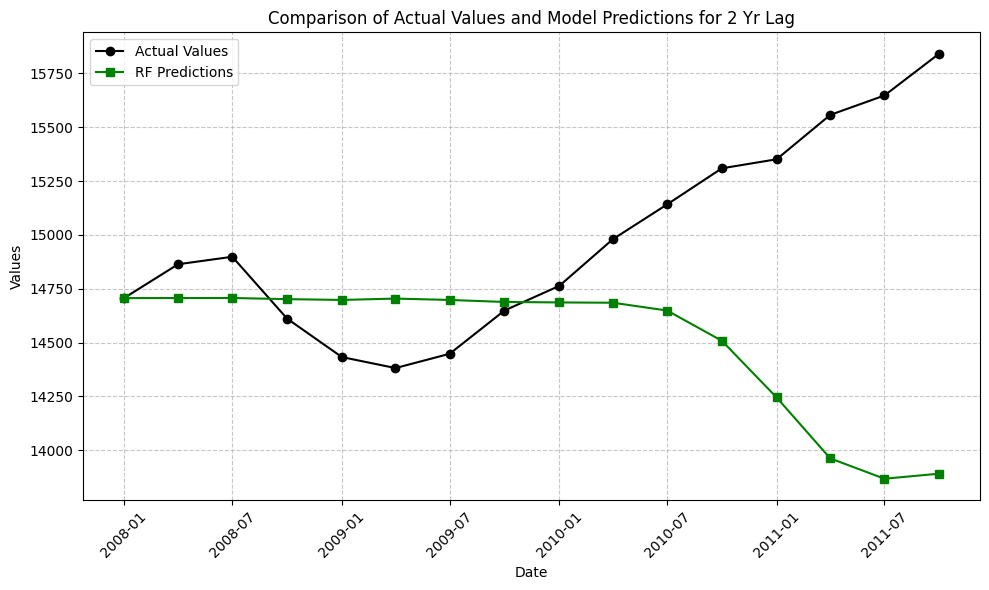

In [35]:
plt.figure(figsize=(10, 6))

plt.plot(actual_points, y_test, label='Actual Values', marker='o', color='black')
plt.plot(actual_points, y_pred_RF, label='RF Predictions', marker='s', color='green')

plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Comparison of Actual Values and Model Predictions for 2 Yr Lag')
plt.legend()
plt.xticks(rotation=45)


plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


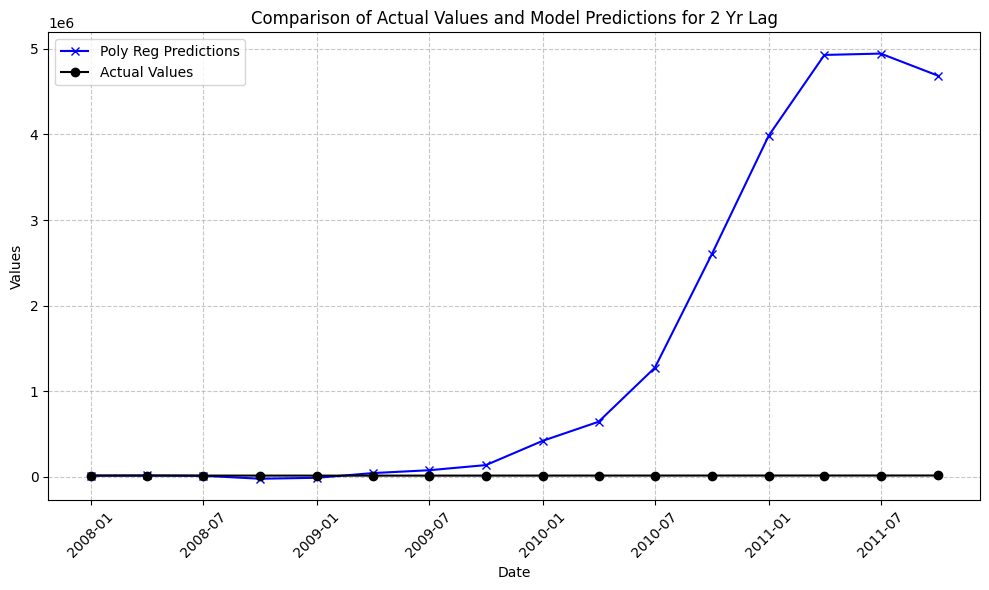

In [36]:
plt.figure(figsize=(10, 6))

plt.plot(actual_points, y_pred_poly, label='Poly Reg Predictions', marker='x', color='blue')
plt.plot(actual_points, y_test, label='Actual Values', marker='o', color='black')

plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Comparison of Actual Values and Model Predictions for 2 Yr Lag')
plt.legend()
plt.xticks(rotation=45)


plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [37]:
list_test_points = ['2018-01-01', '2018-04-01', '2018-07-01', '2018-10-01', '2019-01-01', '2019-04-01', '2019-07-01', '2019-10-01',
                    '2020-01-01', '2020-04-01', '2020-07-01', '2020-10-01', '2021-01-01', '2021-04-01', '2021-07-01', '2021-10-01']
list_test_points = pd.to_datetime(list_test_points)

actual_points = ['2020-01-01', '2020-04-01', '2020-07-01', '2020-10-01', '2021-01-01', '2021-04-01', '2021-07-01', '2021-10-01',
                  '2022-01-01', '2022-04-01', '2022-07-01', '2022-10-01', '2023-01-01', '2023-04-01', '2023-07-01', '2023-10-01']
actual_points = pd.to_datetime(actual_points)

test_data = data_set[data_set['DATE'].isin(list_test_points)]
x_test = test_data[feature_vars].to_numpy()
y_test = test_data[target_var].to_numpy()

y_pred_poly = PolyReg_Model.predict(x_test)
y_pred_RF = RF_model.predict(x_test)

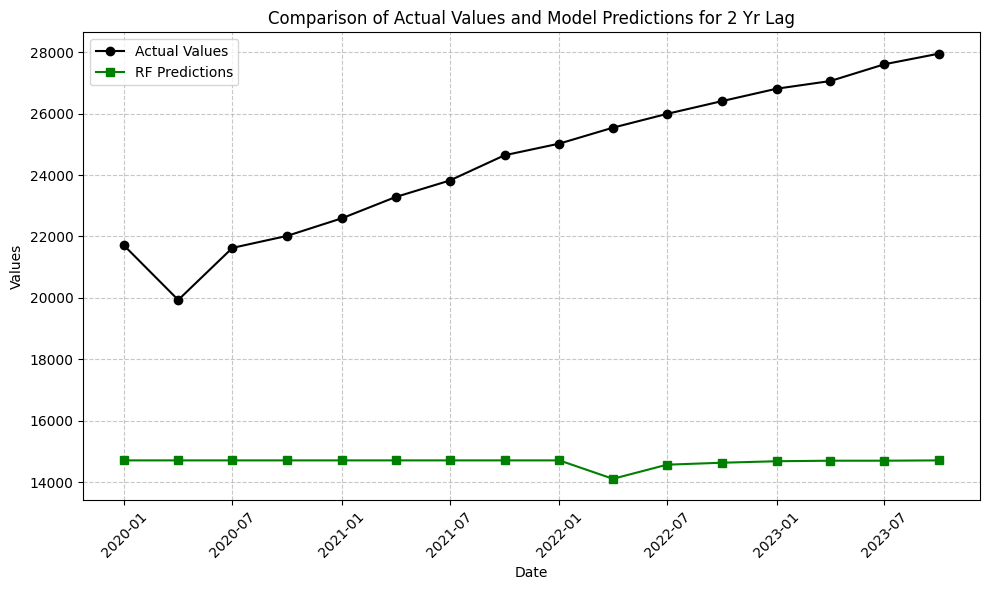

In [38]:
plt.figure(figsize=(10, 6))

plt.plot(actual_points, y_test, label='Actual Values', marker='o', color='black')
plt.plot(actual_points, y_pred_RF, label='RF Predictions', marker='s', color='green')

plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Comparison of Actual Values and Model Predictions for 2 Yr Lag')
plt.legend()
plt.xticks(rotation=45)


plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

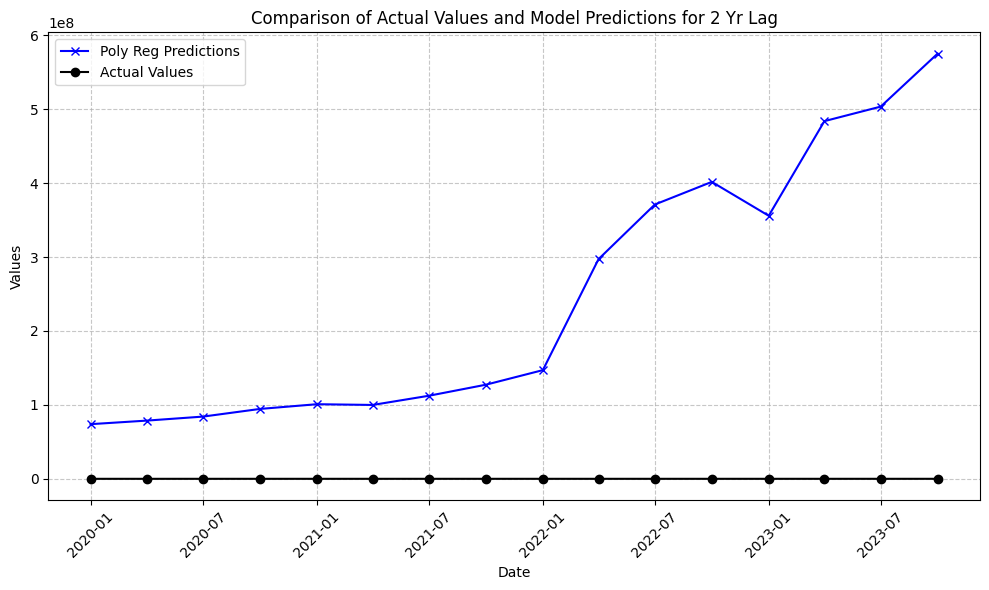

In [39]:
plt.figure(figsize=(10, 6))

plt.plot(actual_points, y_pred_poly, label='Poly Reg Predictions', marker='x', color='blue')
plt.plot(actual_points, y_test, label='Actual Values', marker='o', color='black')

plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Comparison of Actual Values and Model Predictions for 2 Yr Lag')
plt.legend()
plt.xticks(rotation=45)


plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## 6 Month Lagged Dataset

In [43]:
data_set = Helper.load_data('6_M_Lag','../Datasets/Lagged/')
data_set = Helper.proc_data(data_set)
data_set['DATE'] = pd.to_datetime(data_set['DATE'], format="%d-%m-%Y")
train_data_set = data_set[data_set['DATE'] < '2007-07-01']

target_var = 'GDP'
feature_vars = train_data_set.columns.to_list()
feature_vars.remove(target_var)
feature_vars.remove('DATE')

x_train = train_data_set[feature_vars].to_numpy()
y_train = train_data_set[target_var].to_numpy()

PolyReg_Model = Pipeline([
                    ('poly_features', PolynomialFeatures(degree=6, interaction_only=True)),  # Polynomial Feature Generator
                    ('linear_regression', LinearRegression(fit_intercept= True))  # Linear regression
                ])

RF_model = RandomForestRegressor(criterion= 'squared_error',max_depth= 30, max_features= 'sqrt', min_samples_leaf= 1, min_samples_split= 2, n_estimators= 1000)

PolyReg_Model.fit(x_train, y_train)
RF_model.fit(x_train, y_train)

RandomForestRegressor(max_depth=30, max_features='sqrt', n_estimators=1000)

In [46]:
list_test_points = ['2007-07-01', '2007-10-01', '2008-01-01', '2008-04-01', '2008-07-01', '2008-10-01', '2009-01-01', '2009-04-01',
                    '2009-07-01', '2009-10-01', '2010-01-01', '2010-04-01', '2010-07-01', '2010-10-01']
list_test_points = pd.to_datetime(list_test_points)

actual_points = ['2008-01-01', '2008-04-01', '2008-07-01', '2008-10-01', '2009-01-01', '2009-04-01', '2009-07-01', '2009-10-01',
                  '2010-01-01', '2010-04-01', '2010-07-01', '2010-10-01', '2011-01-01', '2011-04-01']
actual_points = pd.to_datetime(actual_points)

test_data = data_set[data_set['DATE'].isin(list_test_points)]
x_test = test_data[feature_vars].to_numpy()
y_test = test_data[target_var].to_numpy()

y_pred_poly = PolyReg_Model.predict(x_test)
y_pred_RF = RF_model.predict(x_test)

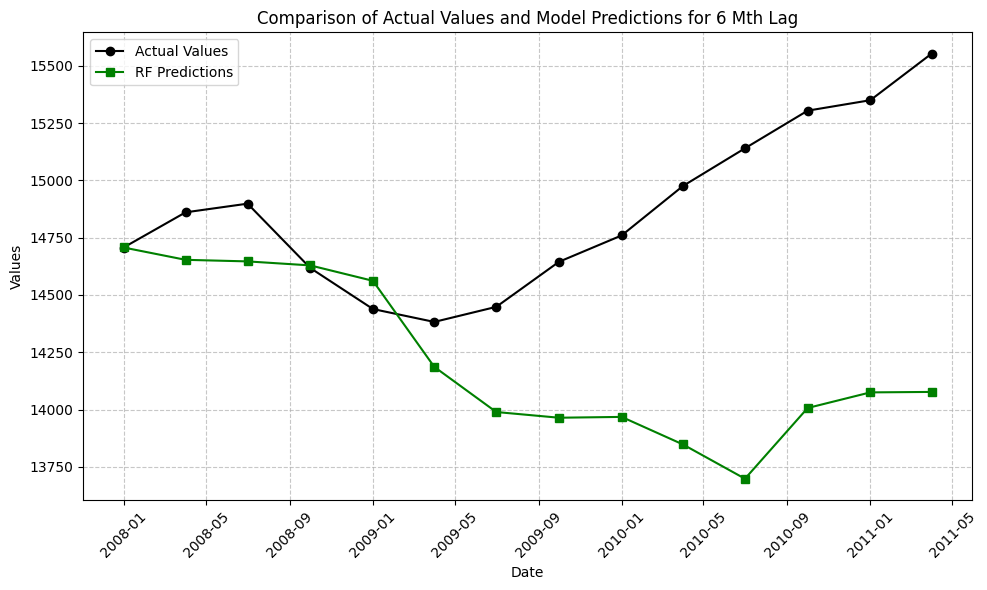

In [47]:
plt.figure(figsize=(10, 6))

plt.plot(actual_points, y_test, label='Actual Values', marker='o', color='black')
plt.plot(actual_points, y_pred_RF, label='RF Predictions', marker='s', color='green')

plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Comparison of Actual Values and Model Predictions for 6 Mth Lag')
plt.legend()
plt.xticks(rotation=45)


plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


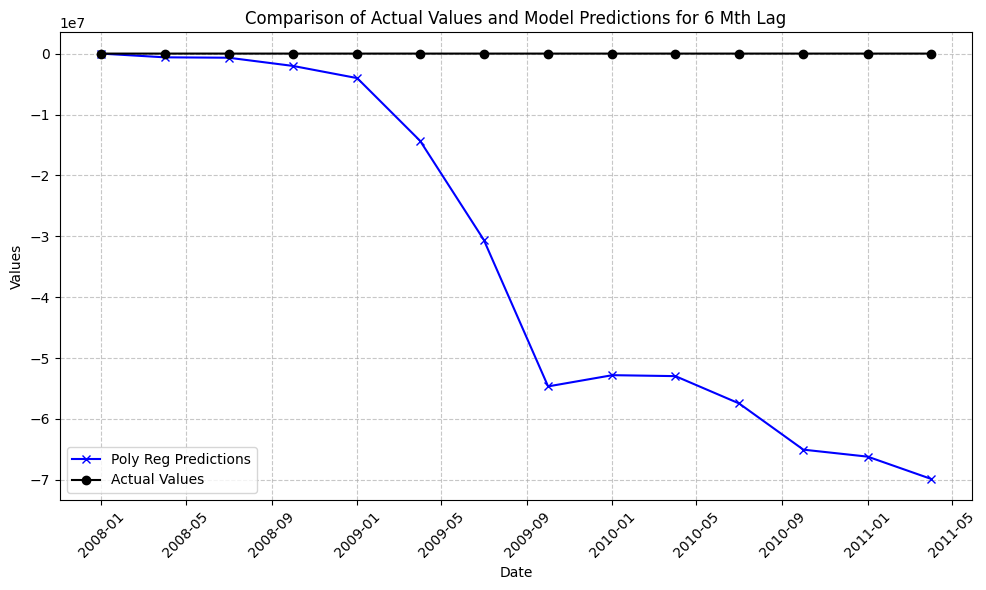

In [48]:
plt.figure(figsize=(10, 6))

plt.plot(actual_points, y_pred_poly, label='Poly Reg Predictions', marker='x', color='blue')
plt.plot(actual_points, y_test, label='Actual Values', marker='o', color='black')

plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Comparison of Actual Values and Model Predictions for 6 Mth Lag')
plt.legend()
plt.xticks(rotation=45)


plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [49]:
list_test_points = ['2019-07-01', '2019-10-01', '2020-01-01', '2020-04-01', '2020-07-01', '2020-10-01', '2021-01-01', '2021-04-01',
                    '2021-07-01', '2021-10-01', '2022-01-01', '2022-04-01', '2022-07-01', '2022-10-01', '2023-01-01', '2023-04-01']
list_test_points = pd.to_datetime(list_test_points)

actual_points = ['2020-01-01', '2020-04-01', '2020-07-01', '2020-10-01', '2021-01-01', '2021-04-01', '2021-07-01', '2021-10-01',
                  '2022-01-01', '2022-04-01', '2022-07-01', '2022-10-01', '2023-01-01', '2023-04-01', '2023-07-01', '2023-10-01']
actual_points = pd.to_datetime(actual_points)

test_data = data_set[data_set['DATE'].isin(list_test_points)]
x_test = test_data[feature_vars].to_numpy()
y_test = test_data[target_var].to_numpy()

y_pred_poly = PolyReg_Model.predict(x_test)
y_pred_RF = RF_model.predict(x_test)

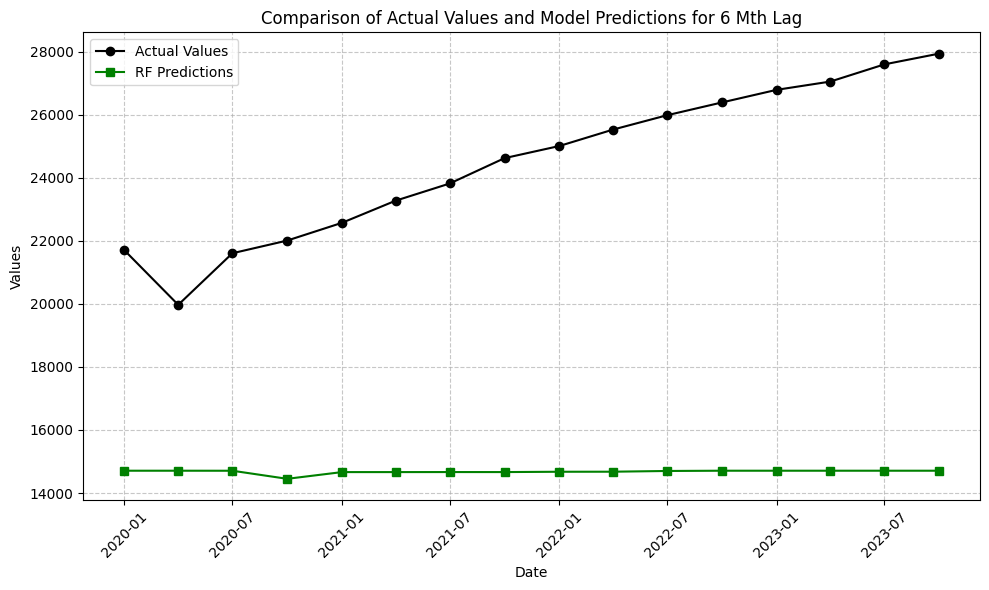

In [50]:
plt.figure(figsize=(10, 6))

plt.plot(actual_points, y_test, label='Actual Values', marker='o', color='black')
plt.plot(actual_points, y_pred_RF, label='RF Predictions', marker='s', color='green')

plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Comparison of Actual Values and Model Predictions for 6 Mth Lag')
plt.legend()
plt.xticks(rotation=45)


plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

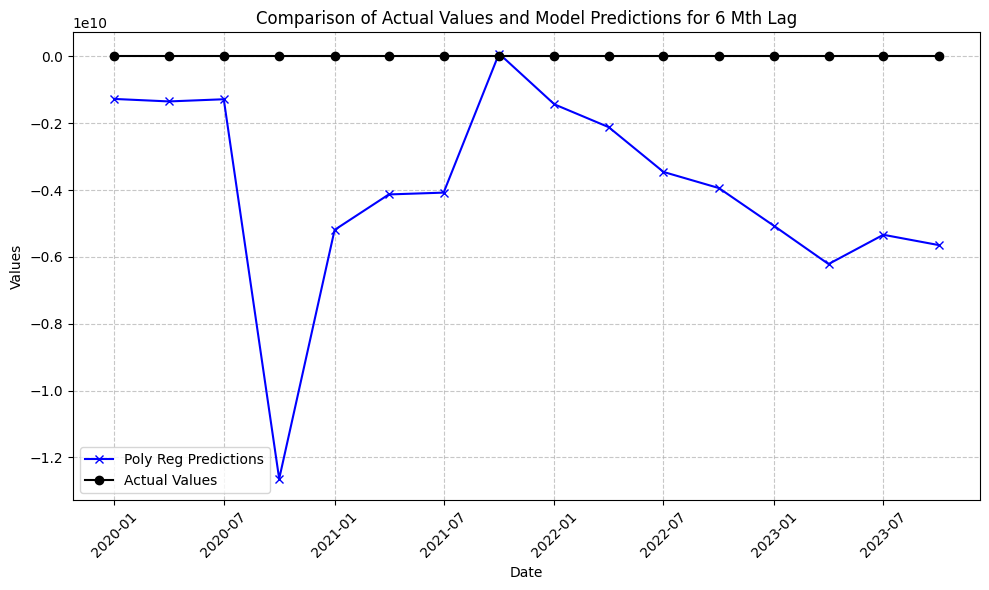

In [51]:
plt.figure(figsize=(10, 6))

plt.plot(actual_points, y_pred_poly, label='Poly Reg Predictions', marker='x', color='blue')
plt.plot(actual_points, y_test, label='Actual Values', marker='o', color='black')

plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Comparison of Actual Values and Model Predictions for 6 Mth Lag')
plt.legend()
plt.xticks(rotation=45)


plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()